Moist Baroclinic Wave 
=====================

A perturbed baroclinically-unstable atmosphere creates a train of baroclinic waves, enhanced by latent heating from the In-line GFDL Microphysics. The dry version of this test is best known from Jablonowski and Williamson (2006) but similar tests date to time immemorial: most notably GFDL legend [Isidoro Orlanski](https://www.gfdl.noaa.gov/isidoro-orlanski-homepage/) built a career out of analyzing variants of idealized baroclinic waves to better understand mesoscale variability, extratropical cyclone structure, downstream development, baroclinic instability, and much more.

Here we show results from hydrostatic simulations; at C96 resolution the nonhydrostatic dynamics has little effect.

In [1]:
import xarray as xa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm, colors
import cartopy.crs as ccrs
import colorsys
import dask #Chunking will be necessary for the larger datasets

In [2]:
xamoist=xa.open_dataset("/archive/lmh/SHiELD/202103/C96.solo.BCmoist.hyd/history/0000000000//atmos_daily.nc",decode_times=False,chunks={'time': 1})
xamoist_p=xa.open_dataset("/archive/lmh/SHiELD/202103/C96.solo.BCmoist.hyd/history/0000000000//atmos_daily_ave.nc",decode_times=False,chunks={'time': 1})
xadry=xa.open_dataset("/archive/lmh/SHiELD/202103/C96.solo.BCdry.hyd/history/0000000000//atmos_daily.nc",decode_times=False,chunks={'time': 1})
xa384=xa.open_dataset("/archive/lmh/SHiELD/202103/C384.solo.BCmoist.hyd/history/0000000000//atmos_daily.nc",decode_times=False,chunks={'time': 1})
xa384dry=xa.open_dataset("/archive/lmh/SHiELD/202103/C384.solo.BCdry.hyd/history/0000000000//atmos_daily.nc",decode_times=False,chunks={'time': 1})

As for most fluid dynamical simulations, you can use it to create pretty pictures. Here is a plot of the 850 mb relative vorticity, 1000 mb temperature, and surface pressure perturbation (negative values dashed) for the baroclinic wave train at days 9 and 10, in a hydrostatic moist C96 (100 km) simulation. Note the pixelization: the output is regridded to one-degree resolution to roughly match the native-grid resolution.

<a list of 17 text.Text objects>

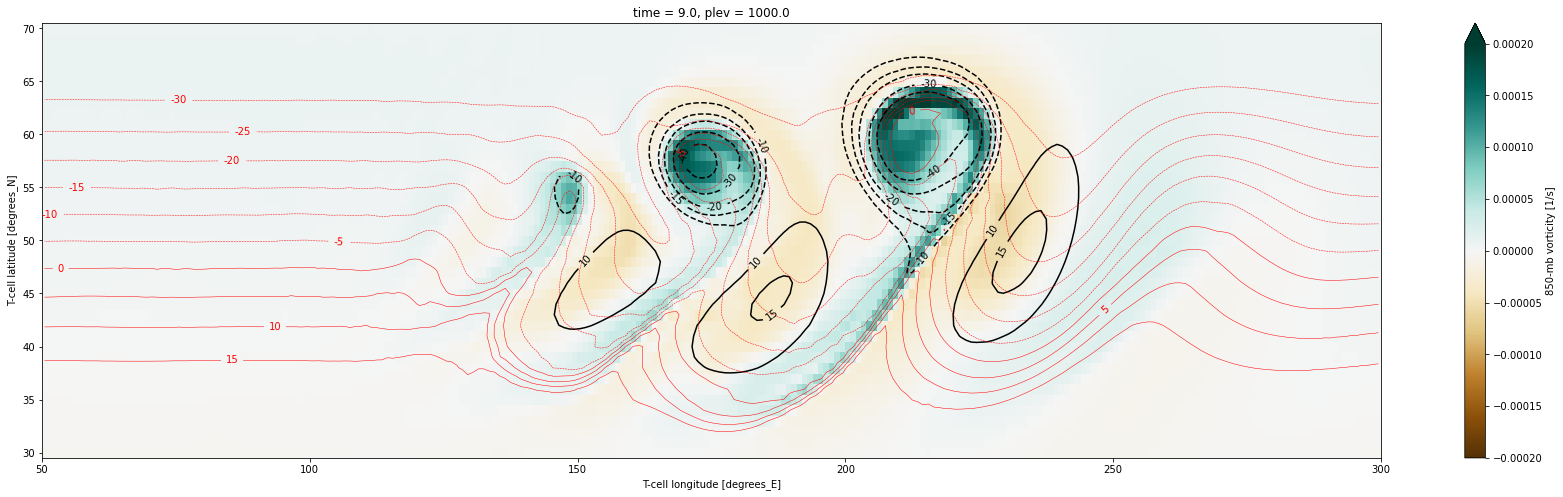

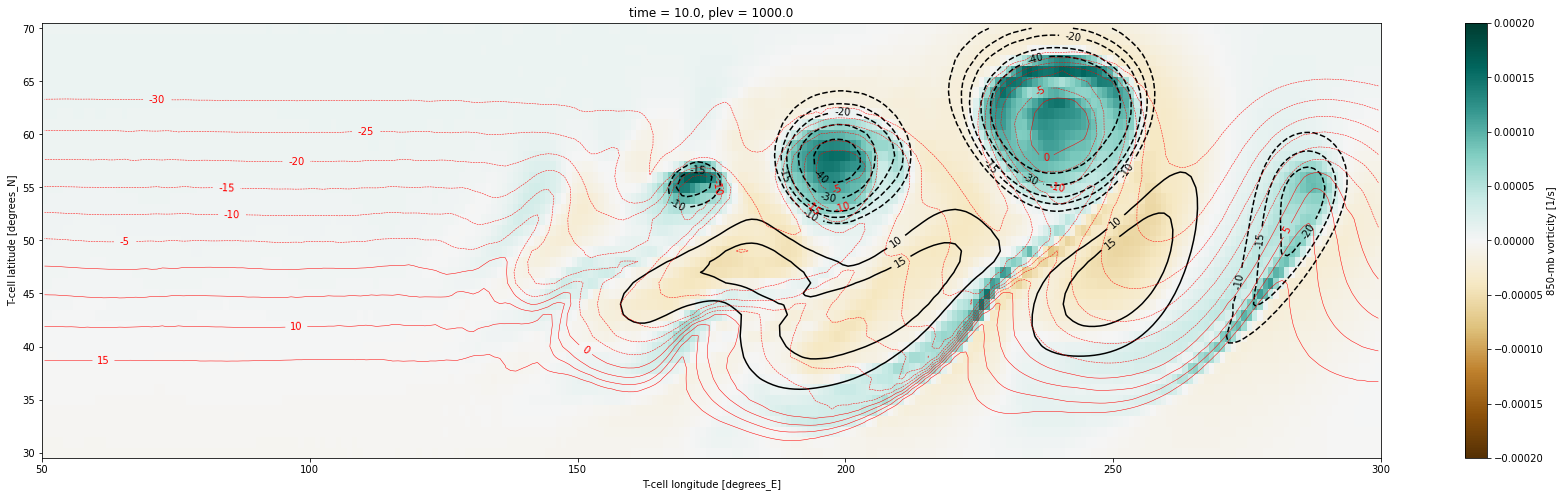

In [3]:
pr_clevs=(-40,-30,-20,-15,-10,10,15,20)
t_clevs=np.arange(-30,20,5)


fig=plt.figure(figsize=(30,8))
datime=xamoist.sel(time=9,lat=slice(30,70),lon=slice(50,300))
datime.VORT850.plot(ax=fig.gca(),vmax=2e-4,vmin=-2e-4,cmap=cm.get_cmap("BrBG"))
cb=(datime.PRESsfc/100.-1000).plot.contour(ax=fig.gca(),colors='k',levels=pr_clevs)
fig.gca().clabel(cb,cb.levels,fmt='%d')
cb=(datime.t_plev.sel(plev=1000)-273.14).plot.contour(ax=fig.gca(),colors='r',linewidths=0.5,levels=t_clevs)
fig.gca().clabel(cb,cb.levels,fmt='%d')


fig=plt.figure(figsize=(30,8))
datime=xamoist.sel(time=10,lat=slice(30,70),lon=slice(50,300))
datime.VORT850.plot(ax=fig.gca(),vmax=2e-4,vmin=-2e-4,cmap=cm.get_cmap("BrBG"))
cb=(datime.PRESsfc/100.-1000).plot.contour(ax=fig.gca(),colors='k',levels=pr_clevs)
fig.gca().clabel(cb,cb.levels,fmt='%d');
cb=(datime.t_plev.sel(plev=1000)-273.14).plot.contour(ax=fig.gca(),colors='r',linewidths=0.5,levels=t_clevs)
fig.gca().clabel(cb,cb.levels,fmt='%d')



We can repeat the analysis with a dry simulation. The principal difference is that the two central low pressure areas do not wrap-up as much, indicating a less-intense wave train.

<a list of 13 text.Text objects>

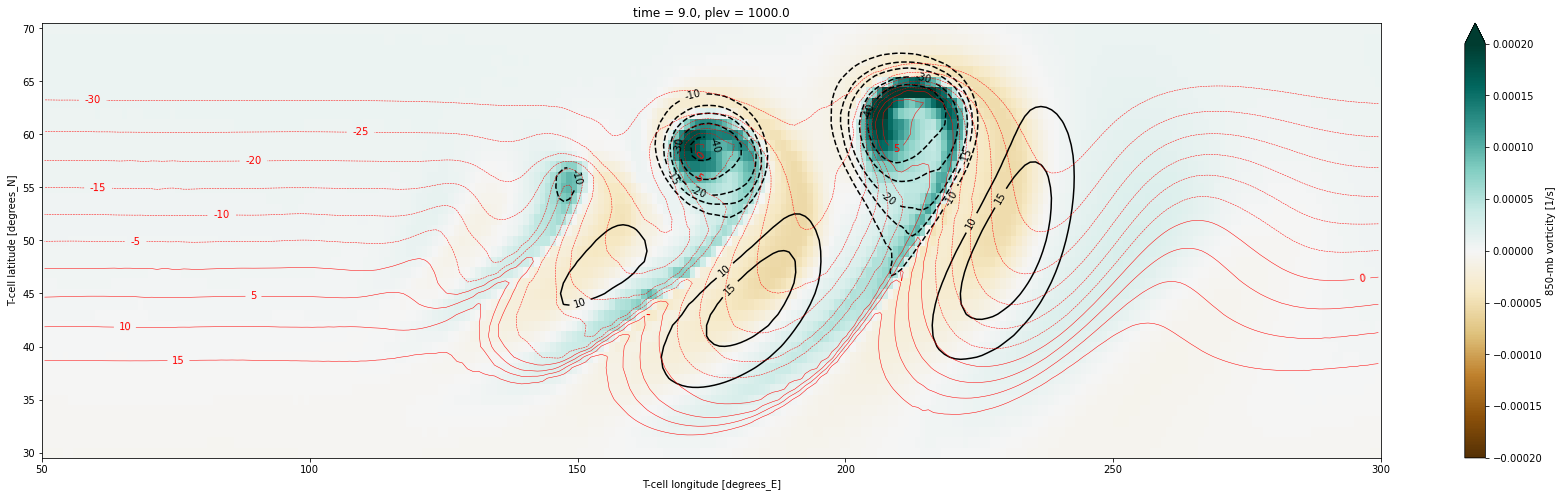

In [4]:

fig=plt.figure(figsize=(30,8))
datime=xadry.sel(time=9,lat=slice(30,70),lon=slice(50,300))
datime.VORT850.plot(ax=fig.gca(),vmax=2e-4,vmin=-2e-4,cmap=cm.get_cmap("BrBG"))
cb=(datime.PRESsfc/100.-1000).plot.contour(ax=fig.gca(),colors='k',levels=pr_clevs)
fig.gca().clabel(cb,cb.levels,fmt='%d')
cb=(datime.t_plev.sel(plev=1000)-273.14).plot.contour(ax=fig.gca(),colors='r',linewidths=0.5,levels=t_clevs)
fig.gca().clabel(cb,cb.levels,fmt='%d')


The moist run uses the full GFDL microphysics, so we can take a look at cloud structures and moisture. The colors represent precipitable water, while black contours show warm water cloud and white ice cloud. The previous day's accumulated precipitation is shown in green. 

It doesn't take much imagination to see:
- Moisture is being transported poleward by the wave train, and wrapping;
- Moisture has been depleted by the clouds and rain (since it is not replenished by surface fluxes);
- Moisture rises along the cold front of the system to the level of condensation and further onto freezing.

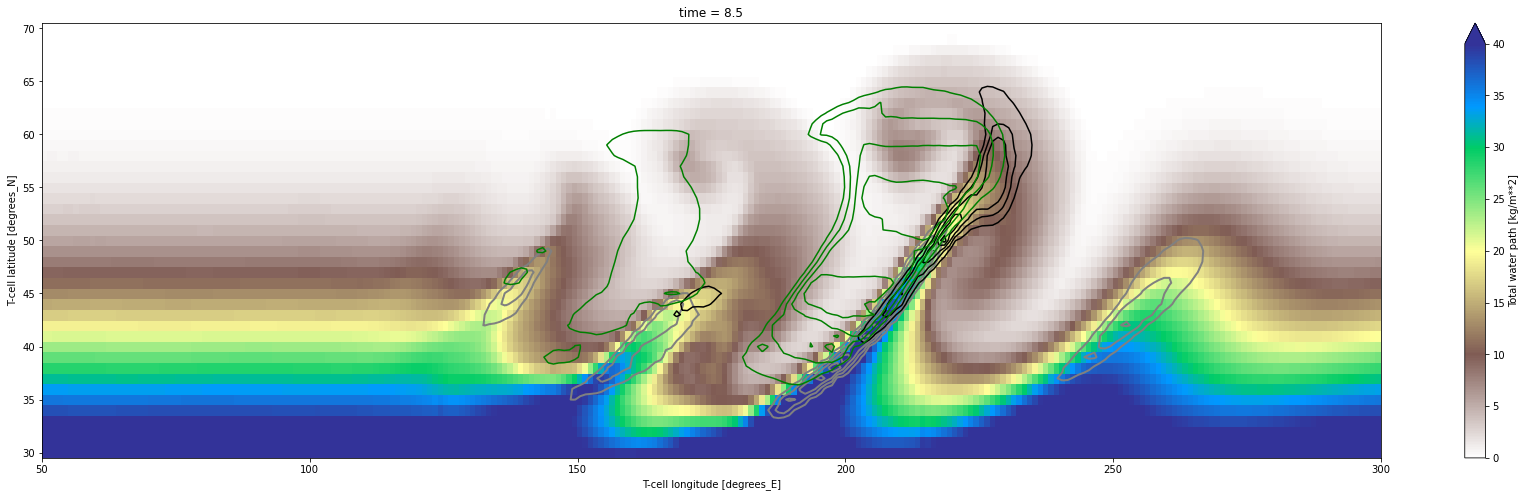

In [5]:
fig=plt.figure(figsize=(30,8))
datime=xamoist.sel(time=9,lat=slice(30,70),lon=slice(50,300),plev=850)
dainit=xamoist.sel(time=1,lat=slice(30,70),lon=slice(50,300),plev=850)
#(datime.t_plev-dainit.t_plev).plot(ax=fig.gca(),vmax=30,vmin=-30,cmap=cm.get_cmap("RdBu_r"))
datime.PWAT.plot(ax=fig.gca(),cmap=cm.get_cmap("terrain_r"),vmax=40, vmin=0)


cb=datime.VIL.plot.contour(ax=fig.gca(),colors='grey',levels=np.arange(0.5,4,0.5),linewidths=2)
#fig.gca().clabel(cb,cb.levels)
#print(cb.levels)
cb=datime.iw.plot.contour(ax=fig.gca(),colors='black',levels=np.arange(0.25,2,0.25))
#fig.gca().clabel(cb,cb.levels)
#print(cb.levels)
prec_acc=xamoist_p.prec.sel(lat=slice(30,70),lon=slice(50,300)).isel(time=8) #thanks to Python's annoying 0-based indexing
cb=prec_acc.plot.contour(ax=fig.gca(),colors='green',levels=np.arange(10,50,10))

Here is a plot of central pressure for the simulations. It is apparent that higher resolution **and** the effects of moisture lead to deeper central pressures.

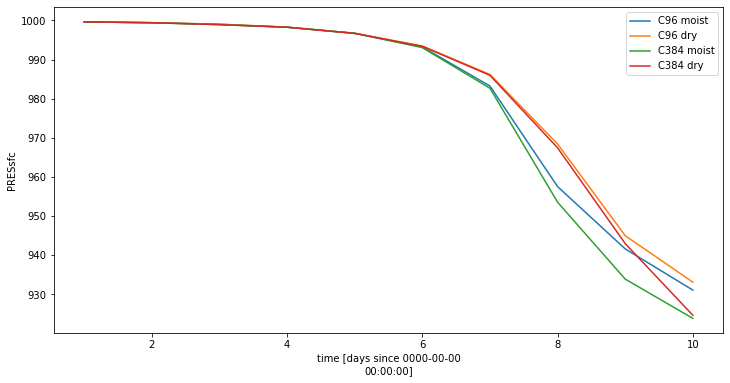

In [16]:
fig=plt.figure(figsize=(12,6))

ps=xamoist.PRESsfc.min(dim=("lon","lat"))/100.
ps.plot(ax=fig.gca(),label="C96 moist")

ps=xadry.PRESsfc.min(dim=("lon","lat"))/100.
ps.plot(ax=fig.gca(),label="C96 dry")

ps=xa384.PRESsfc.min(dim=("lon","lat"))/100.
ps.plot(ax=fig.gca(),label="C384 moist")

ps=xa384dry.PRESsfc.min(dim=("lon","lat"))/100.
ps.plot(ax=fig.gca(),label="C384 dry")

plt.legend()

The additional latent heating, which is concentrated in the warm sector of the tropical cyclone, leads to additional baroclinicity. Here is plotted the temperature difference in the 700--850 mb layer at day 9 from the initial conditions, the difference from the dry run (black contours), and the daily-total latent heating in the same layer for the moist run. Here we show day 8 in which the difference between the dry and moist simulations is largest. (The green contours indicate cooling, likely due to rain evaporation and heat transport by sedimentation of rain water.)

From this plot it is clear that there is enhanced baroclinicity from the diabatic heating in the moist case.

[-30. -20. -10.  10.  20.  30.]


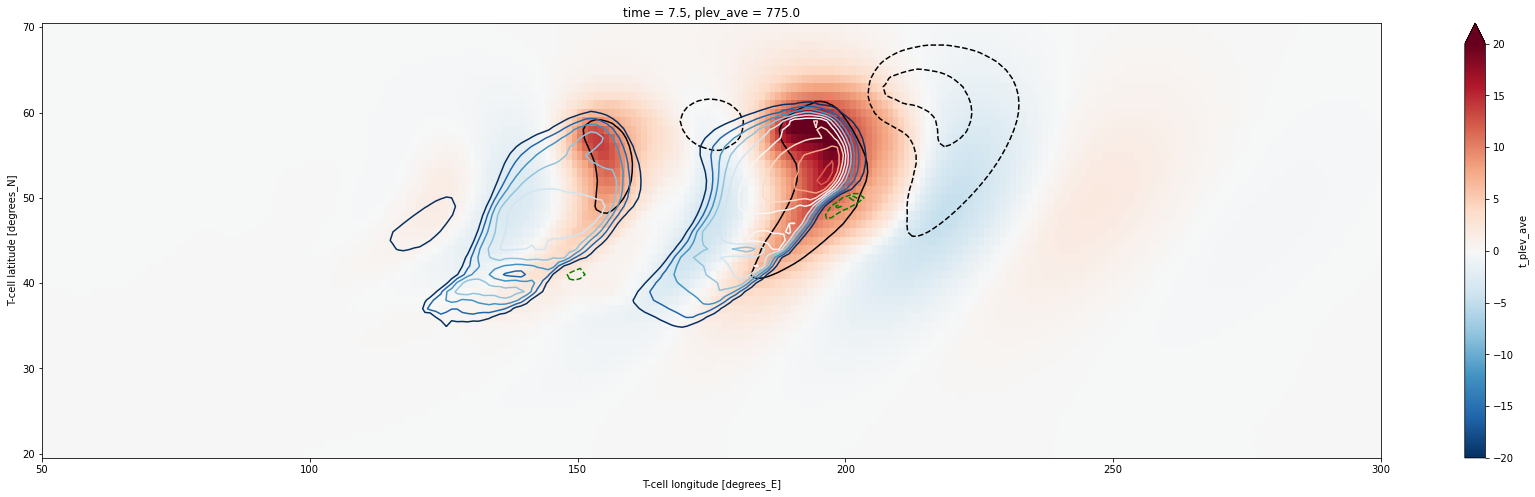

In [11]:
fig=plt.figure(figsize=(30,8))
datime=xamoist.sel(time=8,lat=slice(20,70),lon=slice(50,300),plev_ave=775)
dainit=xamoist.sel(time=1,lat=slice(20,70),lon=slice(50,300),plev_ave=775)
(datime.t_plev_ave-dainit.t_plev_ave).plot(ax=fig.gca(),vmax=20,vmin=-20,cmap=cm.get_cmap("RdBu_r"))

datime_dry=xadry.sel(time=9,lat=slice(20,70),lon=slice(50,300),plev_ave=775)
cb=(datime.t_plev_ave-datime_dry.t_plev_ave).plot.contour(ax=fig.gca(),colors='k',levels=[-30,-20,-10,10,20,30])
print(cb.levels)

#t_dt=xamoist_p.t_dt_gfdlmp_plev_ave.isel(time=slice(0,7)).sel(lat=slice(20,70),lon=slice(50,300),plev_ave=775).sum(dim="time")*86400 #0-based indexing again
t_dt=xamoist_p.t_dt_gfdlmp_plev_ave.isel(time=7).sel(lat=slice(20,70),lon=slice(50,300),plev_ave=775)*86400 #0-based indexing again
cb=t_dt.plot.contour(levels=np.arange(0.5,6,0.5))
cb=t_dt.plot.contour(levels=np.arange(-1.0,0,0.5),colors='green')

Finally, a few plots from the high-resolution C384 run. Note the very fine-scale frontal structures especially in vorticity, a hallmark of FV3's emphasis on vorticity dynamics. In these runs it is very clear that diabatic effects help not only create a stronger cyclone but can also enhance the creation of fine-scale frontal features.

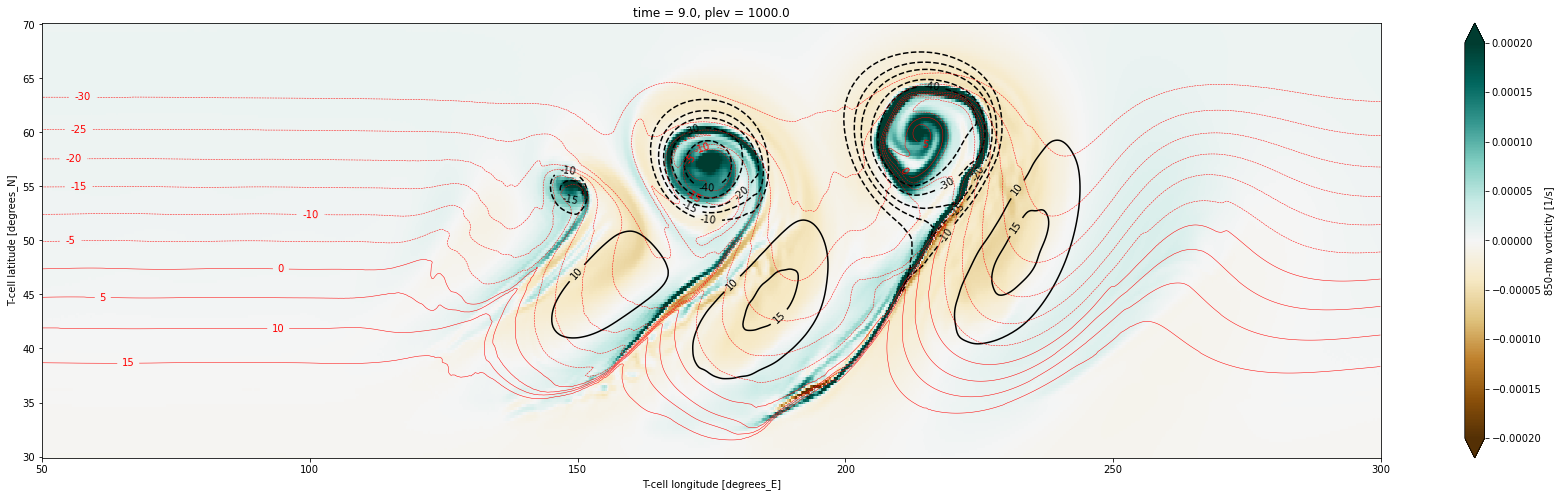

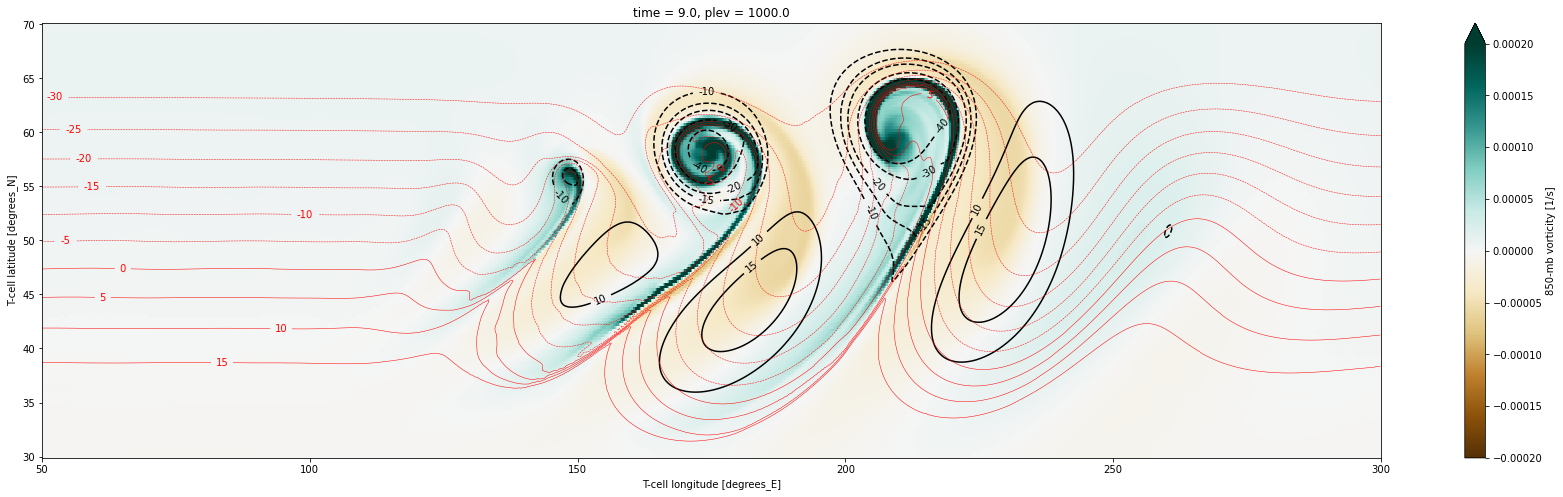

In [12]:

fig=plt.figure(figsize=(30,8))
datime=xa384.sel(time=9,lat=slice(30,70),lon=slice(50,300))
datime.VORT850.plot(ax=fig.gca(),vmax=2e-4,vmin=-2e-4,cmap=cm.get_cmap("BrBG"))
cb=(datime.PRESsfc/100.-1000).plot.contour(ax=fig.gca(),colors='k',levels=pr_clevs)
fig.gca().clabel(cb,cb.levels,fmt='%d')
cb=(datime.t_plev.sel(plev=1000)-273.14).plot.contour(ax=fig.gca(),colors='r',linewidths=0.5,levels=t_clevs)
fig.gca().clabel(cb,cb.levels,fmt='%d');

fig=plt.figure(figsize=(30,8))
datime=xa384dry.sel(time=9,lat=slice(30,70),lon=slice(50,300))
datime.VORT850.plot(ax=fig.gca(),vmax=2e-4,vmin=-2e-4,cmap=cm.get_cmap("BrBG"))
cb=(datime.PRESsfc/100.-1000).plot.contour(ax=fig.gca(),colors='k',levels=pr_clevs)
fig.gca().clabel(cb,cb.levels,fmt='%d')
cb=(datime.t_plev.sel(plev=1000)-273.14).plot.contour(ax=fig.gca(),colors='r',linewidths=0.5,levels=t_clevs)
fig.gca().clabel(cb,cb.levels,fmt='%d');


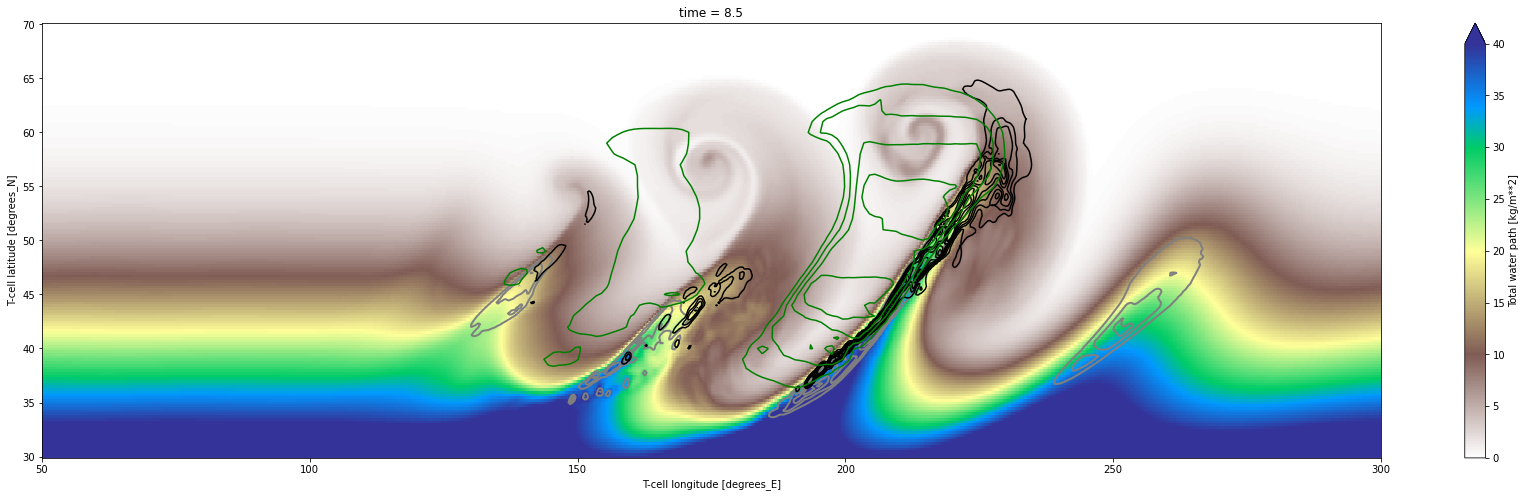

In [9]:
fig=plt.figure(figsize=(30,8))
datime=xa384.sel(time=9,lat=slice(30,70),lon=slice(50,300),plev=850)
dainit=xa384.sel(time=1,lat=slice(30,70),lon=slice(50,300),plev=850)
#(datime.t_plev-dainit.t_plev).plot(ax=fig.gca(),vmax=30,vmin=-30,cmap=cm.get_cmap("RdBu_r"))
datime.PWAT.plot(ax=fig.gca(),cmap=cm.get_cmap("terrain_r"),vmax=40, vmin=0)


cb=datime.VIL.plot.contour(ax=fig.gca(),colors='grey',levels=np.arange(0.5,4,0.5),linewidths=2)
#fig.gca().clabel(cb,cb.levels)
#print(cb.levels)
cb=datime.iw.plot.contour(ax=fig.gca(),colors='black',levels=np.arange(0.25,2,0.25))
#fig.gca().clabel(cb,cb.levels)
#print(cb.levels)
prec_acc=xamoist_p.prec.sel(lat=slice(30,70),lon=slice(50,300)).isel(time=8) #thanks to Python's annoying 0-based indexing
cb=prec_acc.plot.contour(ax=fig.gca(),colors='green',levels=np.arange(10,50,10))

A word on simple idealized test cases
=================================

This baroclinic wave test case (usually in its dry, adiabatic form) is often used as a means of evaluating dynamical cores, which most frequently means comparing the minimum pressure and declaring a core or a configuration of a core with deeper minimum pressure to be "best". This sort of thinking requires a number of hidden assumptions, not the least of which that a model that creates deeper cyclones is "better". A short discussion with any weather forecaster should disabuse the reader of this notion. 

Furthermore, this test will progressively deepen the cyclone until the meridional temperature gradient is spent and other dynamical processes take over; it is missing any of a number of processes that would either restore the temperature gradient (as in the Held-Suarez test) or provide constraints on the growth or lifetime of the cyclone, such as surface friction, turbulent mixing, orography, etc., making this test unrealistic and unrepresentative of a real-world modeling situation. Indeed it is the ability of a dynamical core to accomodate these physical processes that forms much of its utility for weather or climate modeling. 

However this test case does illustrate a clear *utility* of idealization: when phenomena (either realistic or pathological) are identified in a comprehensive model that may or may not match real extratropical cyclones, it is often useful to formulate a simplified version of the event at hand to more easily and deeply investigate it. This is true whether it is to dig into the physical causes for a phenomenon, or to investigate why a model may be creating a weird result. Idealized cases like this are also useful for debugging or demonstrating basic capability of a dynamical core. However, as for all toy models of real systems, one must always keep in mind the following points:
A. Applicability to the full system, in this case either the comprehensive model or the real atmosphere; and 
B. not to push such an example beyond its limits

In particular if the idealized test does not replicate the behavior seen in a comprehensive model, especially in one that has demonstrated useful simulation quality or predictive skill, then one should consider examining a different test to shed light on th esituation.